<a href="https://colab.research.google.com/github/RichmondQuaison/UK-fake-licence-detector/blob/main/UK_FAKE_LICENCE_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UK Fake License Detector

In [30]:
# Import necessary libraries
from skimage.metrics import structural_similarity  # For comparing similarity between images
import imutils  # For various image processing functions
import cv2  # OpenCV library for image manipulation
from PIL import Image  # Pillow library for image processing
import requests  # For making HTTP requests to get an image from a URL

In [31]:
# Create a directory named 'uk_card_tampering'
!mkdir uk_card_tampering

# Create a directory named 'image' inside 'uk_card_tampering'
!mkdir uk_card_tampering/image

mkdir: cannot create directory ‘uk_card_tampering’: File exists
mkdir: cannot create directory ‘uk_card_tampering/image’: File exists


In [32]:

# Load the original image from URL into a PIL Image object
original = Image.open(requests.get('https://blog.aph.com/wp-content/uploads/2017/07/UK_Driving_Licence_Example.jpg', stream=True).raw)

# Load the tampered image from URL into a PIL Image object
tampered = Image.open(requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQN1JHXVJGvCdAtMJDZMCtRmja3Zt-nMj-QbpZgSu_3Ag&s', stream=True).raw)

In [33]:

# Print the format of the original image
print("The format of original image is : ", original.format)

# Print the format of the tampered image
print("The format of tampered image is: ", tampered.format)

# Print the size of the original image
print("The size of the original image is : ", original.size)

# Print the size of the tampered image
print("The size of the tampered image is : ", tampered.size)

The format of original image is :  JPEG
The format of tampered image is:  JPEG
The size of the original image is :  (800, 450)
The size of the tampered image is :  (287, 175)


In [34]:

# Resize the original image to (250, 160) pixels
original = original.resize((250, 160))

# Print the new size of the original image
print(original.size)

# Save the resized original image
original.save('uk_card_tampering/image/original.jpg')

# Resize the tampered image to (250, 160) pixels
tampered = tampered.resize((250, 160))

# Print the new size of the tampered image
print(tampered.size)

# Save the resized tampered image
tampered.save('uk_card_tampering/image/tampered.jpg')

(250, 160)
(250, 160)


In [35]:
# Open the original image from the saved file
original = Image.open('uk_card_tampering/image/original.jpg')

# Save the original image back to the same file (essentially no change)
original.save('uk_card_tampering/image/original.jpg')

# Open the tampered image from the saved file
tampered = Image.open('uk_card_tampering/image/tampered.jpg')

# Save the tampered image back to the same file (essentially no change)
tampered.save('uk_card_tampering/image/tampered.jpg')

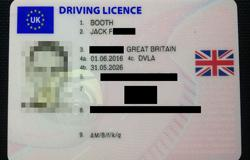

In [36]:
original

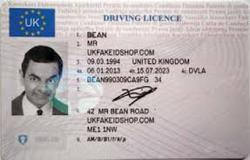

In [37]:
tampered

In [38]:
# Read the original image using OpenCV
# This will read the image in BGR format
original = cv2.imread('uk_card_tampering/image/original.jpg')

# Read the tampered image using OpenCV
# This will read the image in BGR format
tampered = cv2.imread('uk_card_tampering/image/tampered.jpg')

In [39]:
# Convert the original image to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

# Convert the tampered image to grayscale
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [40]:
# Calculate the Structural Similarity Index (SSIM) between the two grayscale images
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM : {}".format(score))

SSIM : 0.2700294439705729


In [41]:
# Calculate the thresholded image from the differences
# Using OTSU's thresholding method to automatically determine the best threshold value
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# Find contours in the thresholded image
# This will find the outlines of the areas where the differences are significant
# Note: Using 'copy' of the thresholded image to prevent modifications to the original
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# For compatibility with different versions of OpenCV, we use 'imutils.grab_contours'
# 'cnts' will now contain the contours
cnts = imutils.grab_contours(cnts)

In [42]:
# For each contour found
for c in cnts:
  # Compute the bounding box for the contour
  (x, y, w, h) = cv2.boundingRect(c)
      # Draw a rectangle around the detected area on the original image
    # This will mark the areas where differences were found
  cv2.rectangle(original, (x,y), (x + w, y + h), (0, 0, 255), 2)
      # Draw a rectangle around the detected area on the tampered image
    # This will mark the areas where differences were found
  cv2.rectangle(tampered, (x,y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


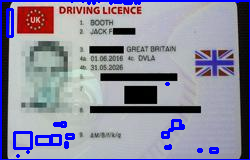

In [43]:

# Create a PIL Image object from the original image (numpy array)
print('Original Format Image')
Image.fromarray(original)

Tampered Format Image


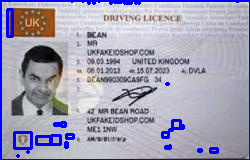

In [44]:
print('Tampered Format Image')
Image.fromarray(tampered)

Difference between Image


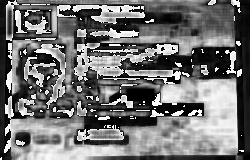

In [45]:
print('Difference between Image')
# Display the "Difference between Images" image
Image.fromarray(diff)

Threshold Difference


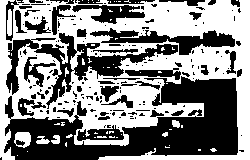

In [46]:
print('Threshold Difference')

# Display the "Threshold Difference" image
Image.fromarray(thresh)

In [47]:
binary_image = Image.fromarray(thresh)
binary_image.save("threshold_image.jpg")

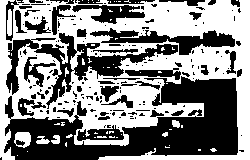

In [48]:
binary_image

In [49]:
diff_image = Image.fromarray(diff)
diff_image.save("diff_image.jpg")

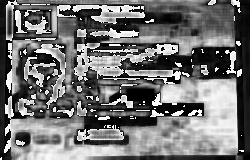

In [50]:
diff_image